**psearch_py_nb.ipynb (V0.5): Jupyter notebook for the Python module psearch_py.py**

Kenneth Mighell (mighell at noao dot edu)   
2018 May 10

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import the psearch_py module (psearch_py.py, optional: psearch_pyc.so)
# The Python/Cython/C code of the psearch_py module is available at 
#     https://github.com/AbhijitSaha/Psearch/tree/master/psearch_py
import psearch_py

In [3]:
# Show the documentation (docstring) of the psearch_py function of the module
print psearch_py.psearch_py.__doc__


    NAME:
        psearch_py

    INPUTS:
        hjd: time (Heliocentric Julian Day) input data array
        mag: magnitude input data array (co-alligned with hjd)
        magerr: magnitude error input data array (co-alligned with hjd)
        filts: filter input data array (co-aligned with hjd) with
            integer identifier indicating passband
        filtnams =  string array containing character names corresponding to
            coded filts values.  E.g., if you have 5 bands labeled u,g,r,i,z
            with filts values 0,1,2,3,4 respectively, filtnams would be set by:
            filtnams = ['u', 'g', 'r', 'i', 'z']
        pmin: Minimum value of period to be tested.
            E.g., pmin = 0.2
        dphi: Maximum change in relative phase between first and last epoch to
            be permitted when stepping to next test period.
            E.g., dphi = 0.02

    OUTPUTS:
        ptest: 1-D array with N dimensions of periods for which the periodograms
            are 

In [4]:
# Show the references for this module
psearch_py.reference()

 
Saha, A., & Vivas, A. K. 2017, Astronomical Journal, 154, 231;
    "A Hybrid Algorithm for Period Analysis from Multiband Data with
    Sparse and Irregular Sampling for Arbitrary Light-curve Shapes"
IDL CODE (Abhijit Saha):
    https://github.com/AbhijitSaha/Psearch
PYTHON/CYTHON/C CODE (Kenenth Mighell):
    https://github.com/AbhijitSaha/Psearch/psearch_py

MODULE:
    /private/tmp/Psearch-master/psearch_py/psearch_py.pyc
    [psearch_py (0.19.4)  mode: Python/Cython/C  (*** fast ***) ]
 



---

Please read the article of **Saha & Vivas (2017, AJ, 154, 231)** for details of the Psearch algorithm.

If you can not get the article, get and read the *preprint* at   
**https://arxiv.org/abs/1709.10156**

The original IDL code is available at   
**https://github.com/AbhijitSaha/Psearch**

The Python/Cython/C code is available at   
**https://github.com/AbhijitSaha/Psearch/tree/master/psearch_py**

---


In [5]:
# Initialize the notebook environment
import numpy as np
import time as tm
import sys
import IPython

if (sys.version_info >= (3, 0)):
    sys.stdout.write("\n\n*** ERROR *** This module requires Python 2.X, " +
        "not Python 3.X\n\n")
    sys.exit(1)

In [6]:
# Get some data
# ugriz DECam observations of ab-type RR Lyrae star OGLE-BLG-RRLYR-11078
# P=0.5016240 days (Soszynski et al. 2014, Acta Astronomica, 64, 177)
ifile = 'B1392all.tab' 
#=============================
hjd_, mag_, magerr_, filts_ = np.loadtxt( ifile, unpack=True)[:4]
ok = (magerr_ > 0.0 ) & (magerr_ <= 0.2)
hjd0    = hjd_[ok]
mag0    = mag_[ok]
magerr0 = magerr_[ok]
filts0  = filts_[ok]
print len(mag0),' good data points found out of', len(mag_)

368  good data points found out of 373


In [7]:
# Select some fraction of the good data set
prob_cut = 1.000  # 100% --> all the data
#prob_cut = 0.5    #  50% --> half of the data
prob = np.random.rand( len(hjd0) )
idx = (prob <= prob_cut)
hjd    = hjd0[idx]
mag    = mag0[idx]
magerr = magerr0[idx]
filts  = filts0[idx]
print len(mag),' data points'

368  data points


In [8]:
# Set pmin, dphi, and filtnams
pmin = 0.20
dphi = 0.02
filtnams = ['u', 'g', 'r', 'i', 'z']

In [9]:
# And away we go!
time00 = tm.time()
periods, psi_m, thresh_m = \
    psearch_py.psearch_py( hjd, mag, magerr, filts, filtnams, pmin, dphi )
time01 = tm.time()
print '\n\n%8.3f seconds [walltime for psearch_py]\n' % (time01-time00)

psearch: BEGIN =====================================================

REFERENCE:
 
Saha, A., & Vivas, A. K. 2017, Astronomical Journal, 154, 231;
    "A Hybrid Algorithm for Period Analysis from Multiband Data with
    Sparse and Irregular Sampling for Arbitrary Light-curve Shapes"
IDL CODE (Abhijit Saha):
    https://github.com/AbhijitSaha/Psearch
PYTHON/CYTHON/C CODE (Kenenth Mighell):
    https://github.com/AbhijitSaha/Psearch/psearch_py

MODULE:
    /private/tmp/Psearch-master/psearch_py/psearch_py.pyc
    [psearch_py (0.19.4)  mode: Python/Cython/C  (*** fast ***) ]
 
psearch:  u  filter
periodpsi2: BEGIN
periodpsi2:  57  observations
periodpsi2: number of frequency samples =  173211
scargle: DONE     0.803 seconds
scargle: DONE     0.793 seconds
scargle: DONE     0.788 seconds
ctheta_slave: DONE     0.528 seconds
ctheta_slave: DONE     0.529 seconds
ctheta_slave: DONE     0.529 seconds
periodpsi2: END
TABLE: BEGIN
rank   -----Period [days]-----       Psi    index  Frequency  Thre

In [10]:
# Show the top 10 peaks of the combined Psi distribution
psearch_py.table_psi_kjm_py( xx=periods, yy=psi_m.sum(0), ee=thresh_m.sum(0), n=10 )


TABLE: BEGIN
rank   -----Period [days]-----       Psi    index  Frequency  Thresh
 1     0.5016247 +-  0.0000036   3411.90    69000   1.993522   53.31
 2     0.5012402 +-  0.0000036   2324.19    69053   1.995051   57.80
 3     0.5020170 +-  0.0000036   2149.13    68946   1.991964   49.69
 4     0.5024026 +-  0.0000036   1204.91    68893   1.990435   42.60
 5     0.5008636 +-  0.0000036   1173.50    69105   1.996552   60.27
 6     0.3339042 +-  0.0000016    836.99   103709   2.994871   41.90
 7     1.0032494 +-  0.0000145    709.01    34450   0.996761   35.37
 8     1.0093552 +-  0.0000147    669.49    34241   0.990732   41.81
 9     1.0047907 +-  0.0000146    663.95    34397   0.995232   42.59
10     1.0108859 +-  0.0000147    597.45    34189   0.989231   41.03
TABLE: END


---

The rank=1 result in the above table gives the best period estimate:

**Period = 0.5016247 +- 0.0000036 days**

which is a frequency of 1.993522.

---

psearch_fig_psi.png  <--- plotfile written  :-)


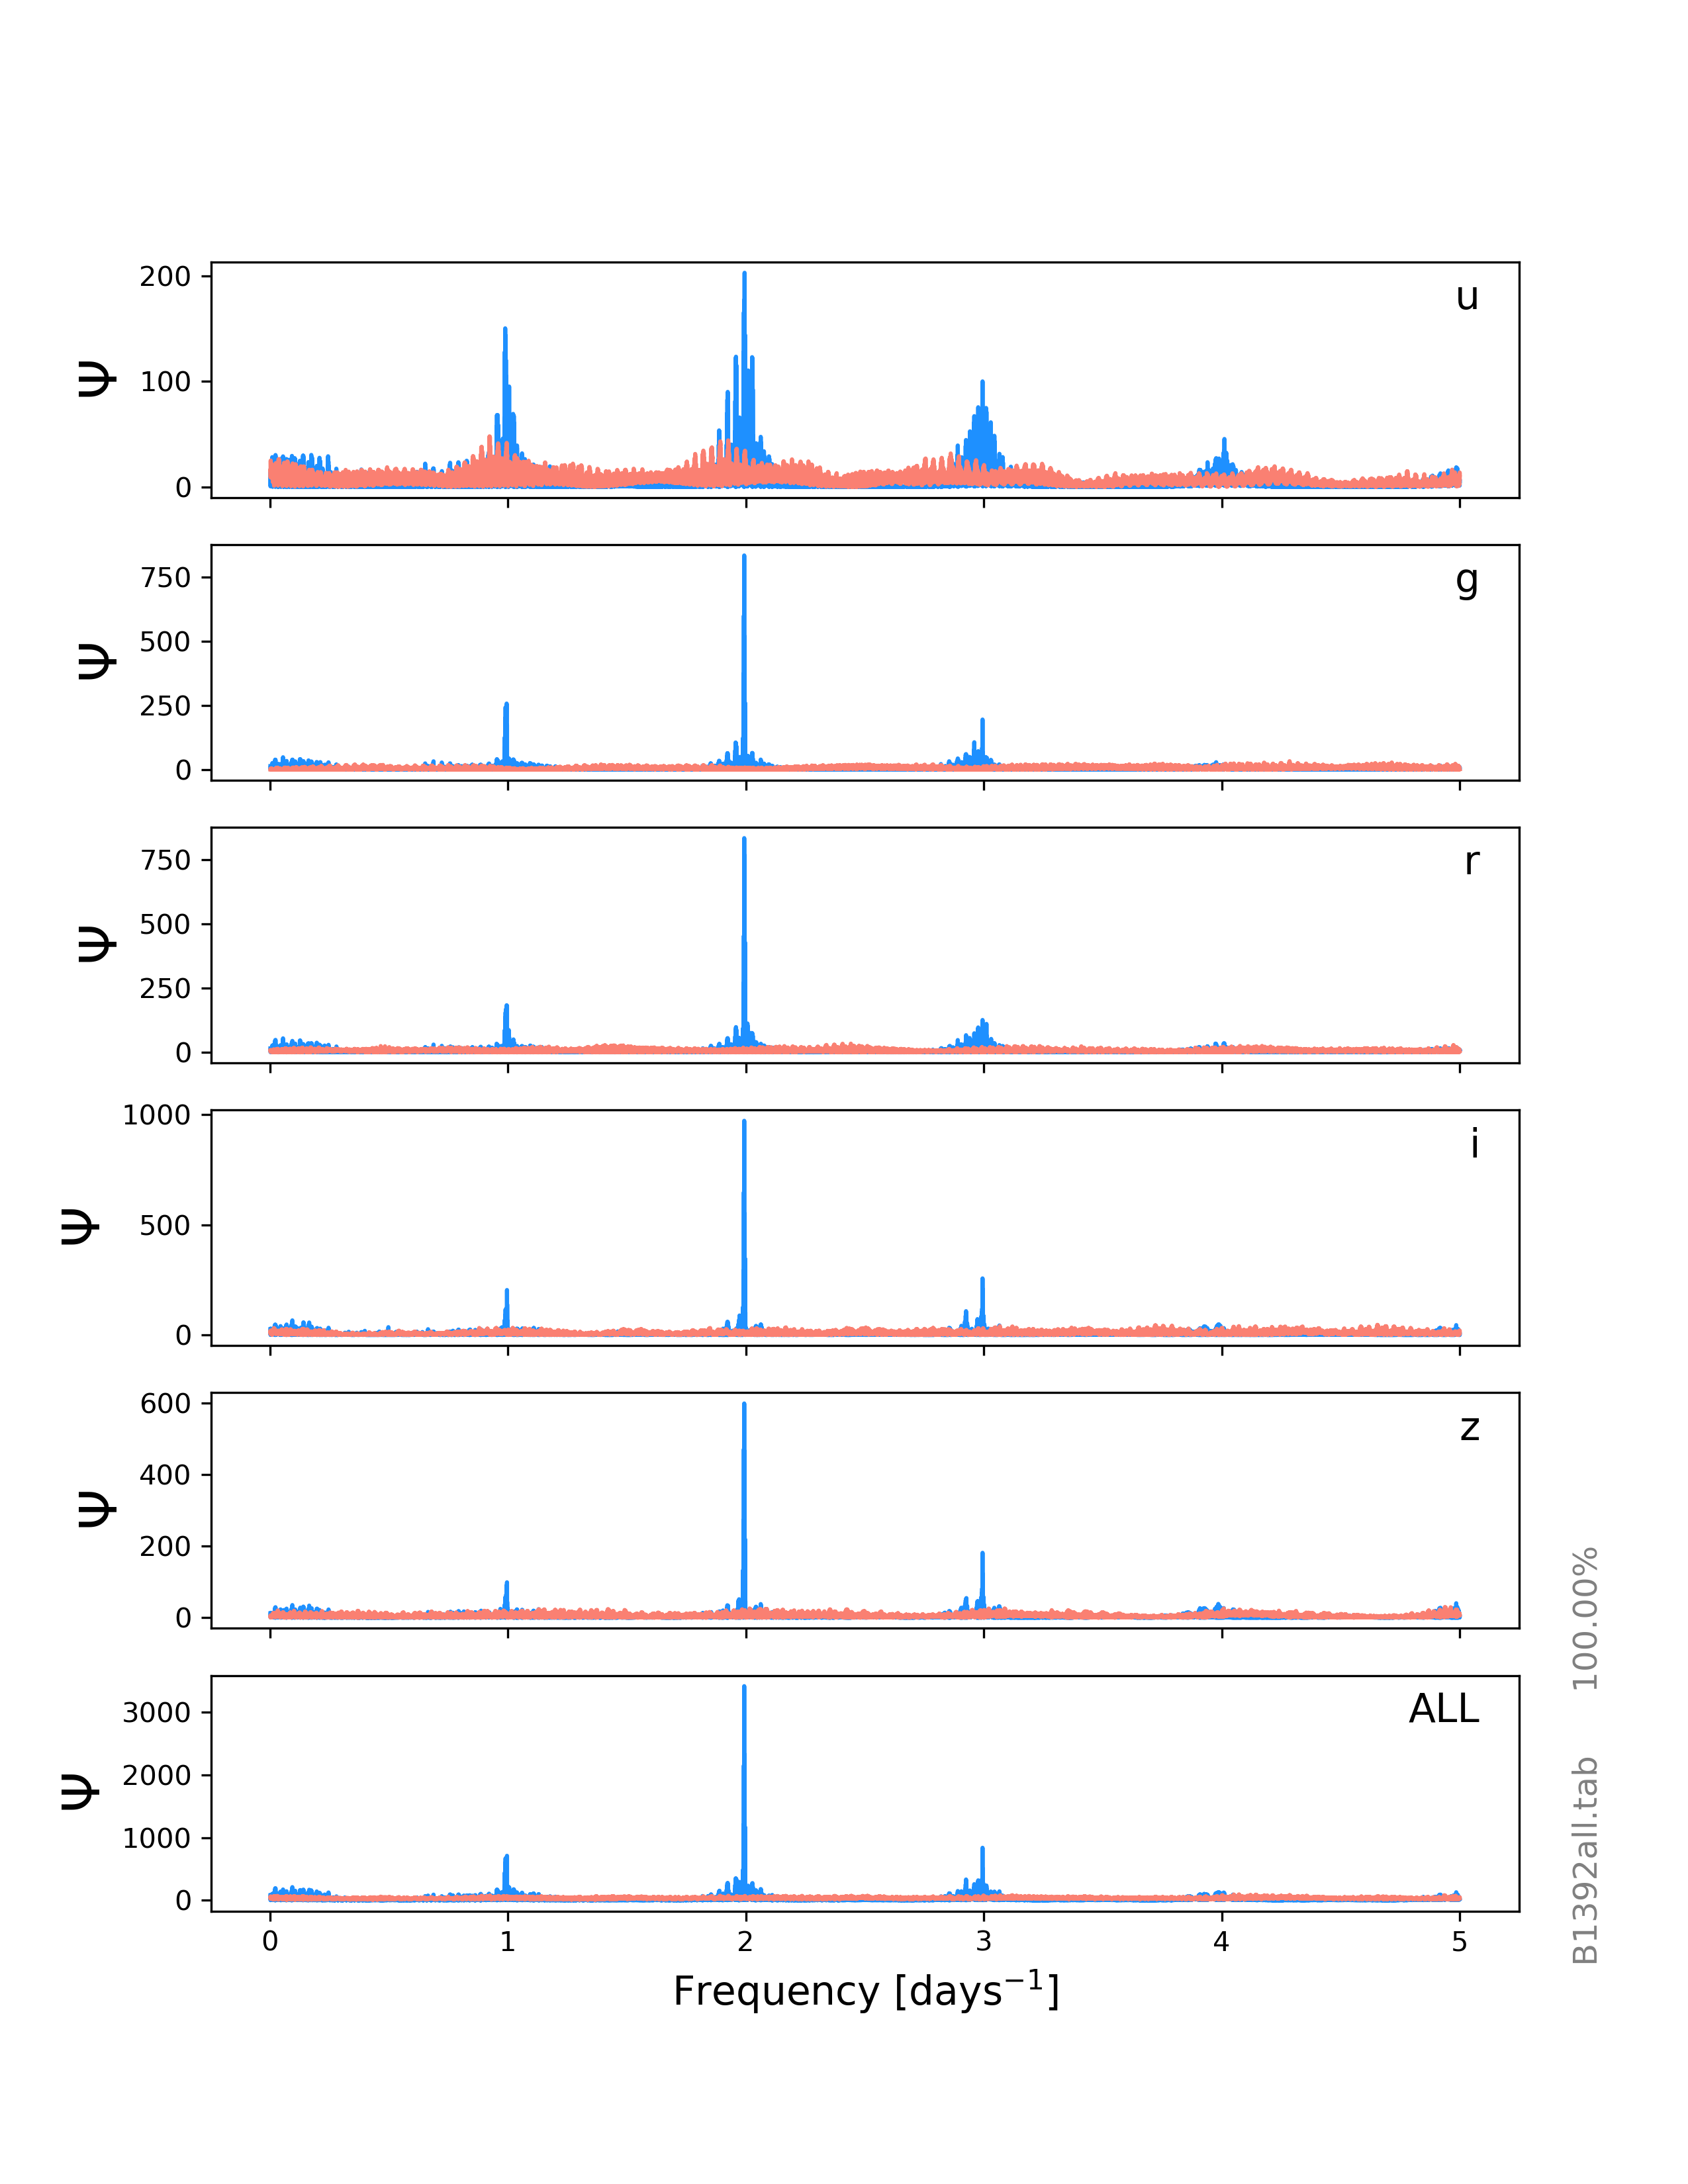

In [11]:
# Plot Psi vs. Frequency for all filters
tag = ifile+'     '+'%7.2f%%' % (prob_cut*100.0)
plot1 = 'psearch_fig_psi.png'
psearch_py.fig_psi_kjm_py( 1/periods, psi_m, thresh_m, filtnams, tag=tag, 
    plotfile=plot1 )
IPython.display.Image(filename=plot1,width=600) 

In [12]:
# Period of the strongest peak of the combined Psi distribution
idx = np.argmax(psi_m.sum(0))
p_peak = periods[idx]
print '\nPeriod: %9.6f' % p_peak


Period:  0.501625


psearch_fig_phi.png  <--- plotfile written  :-)


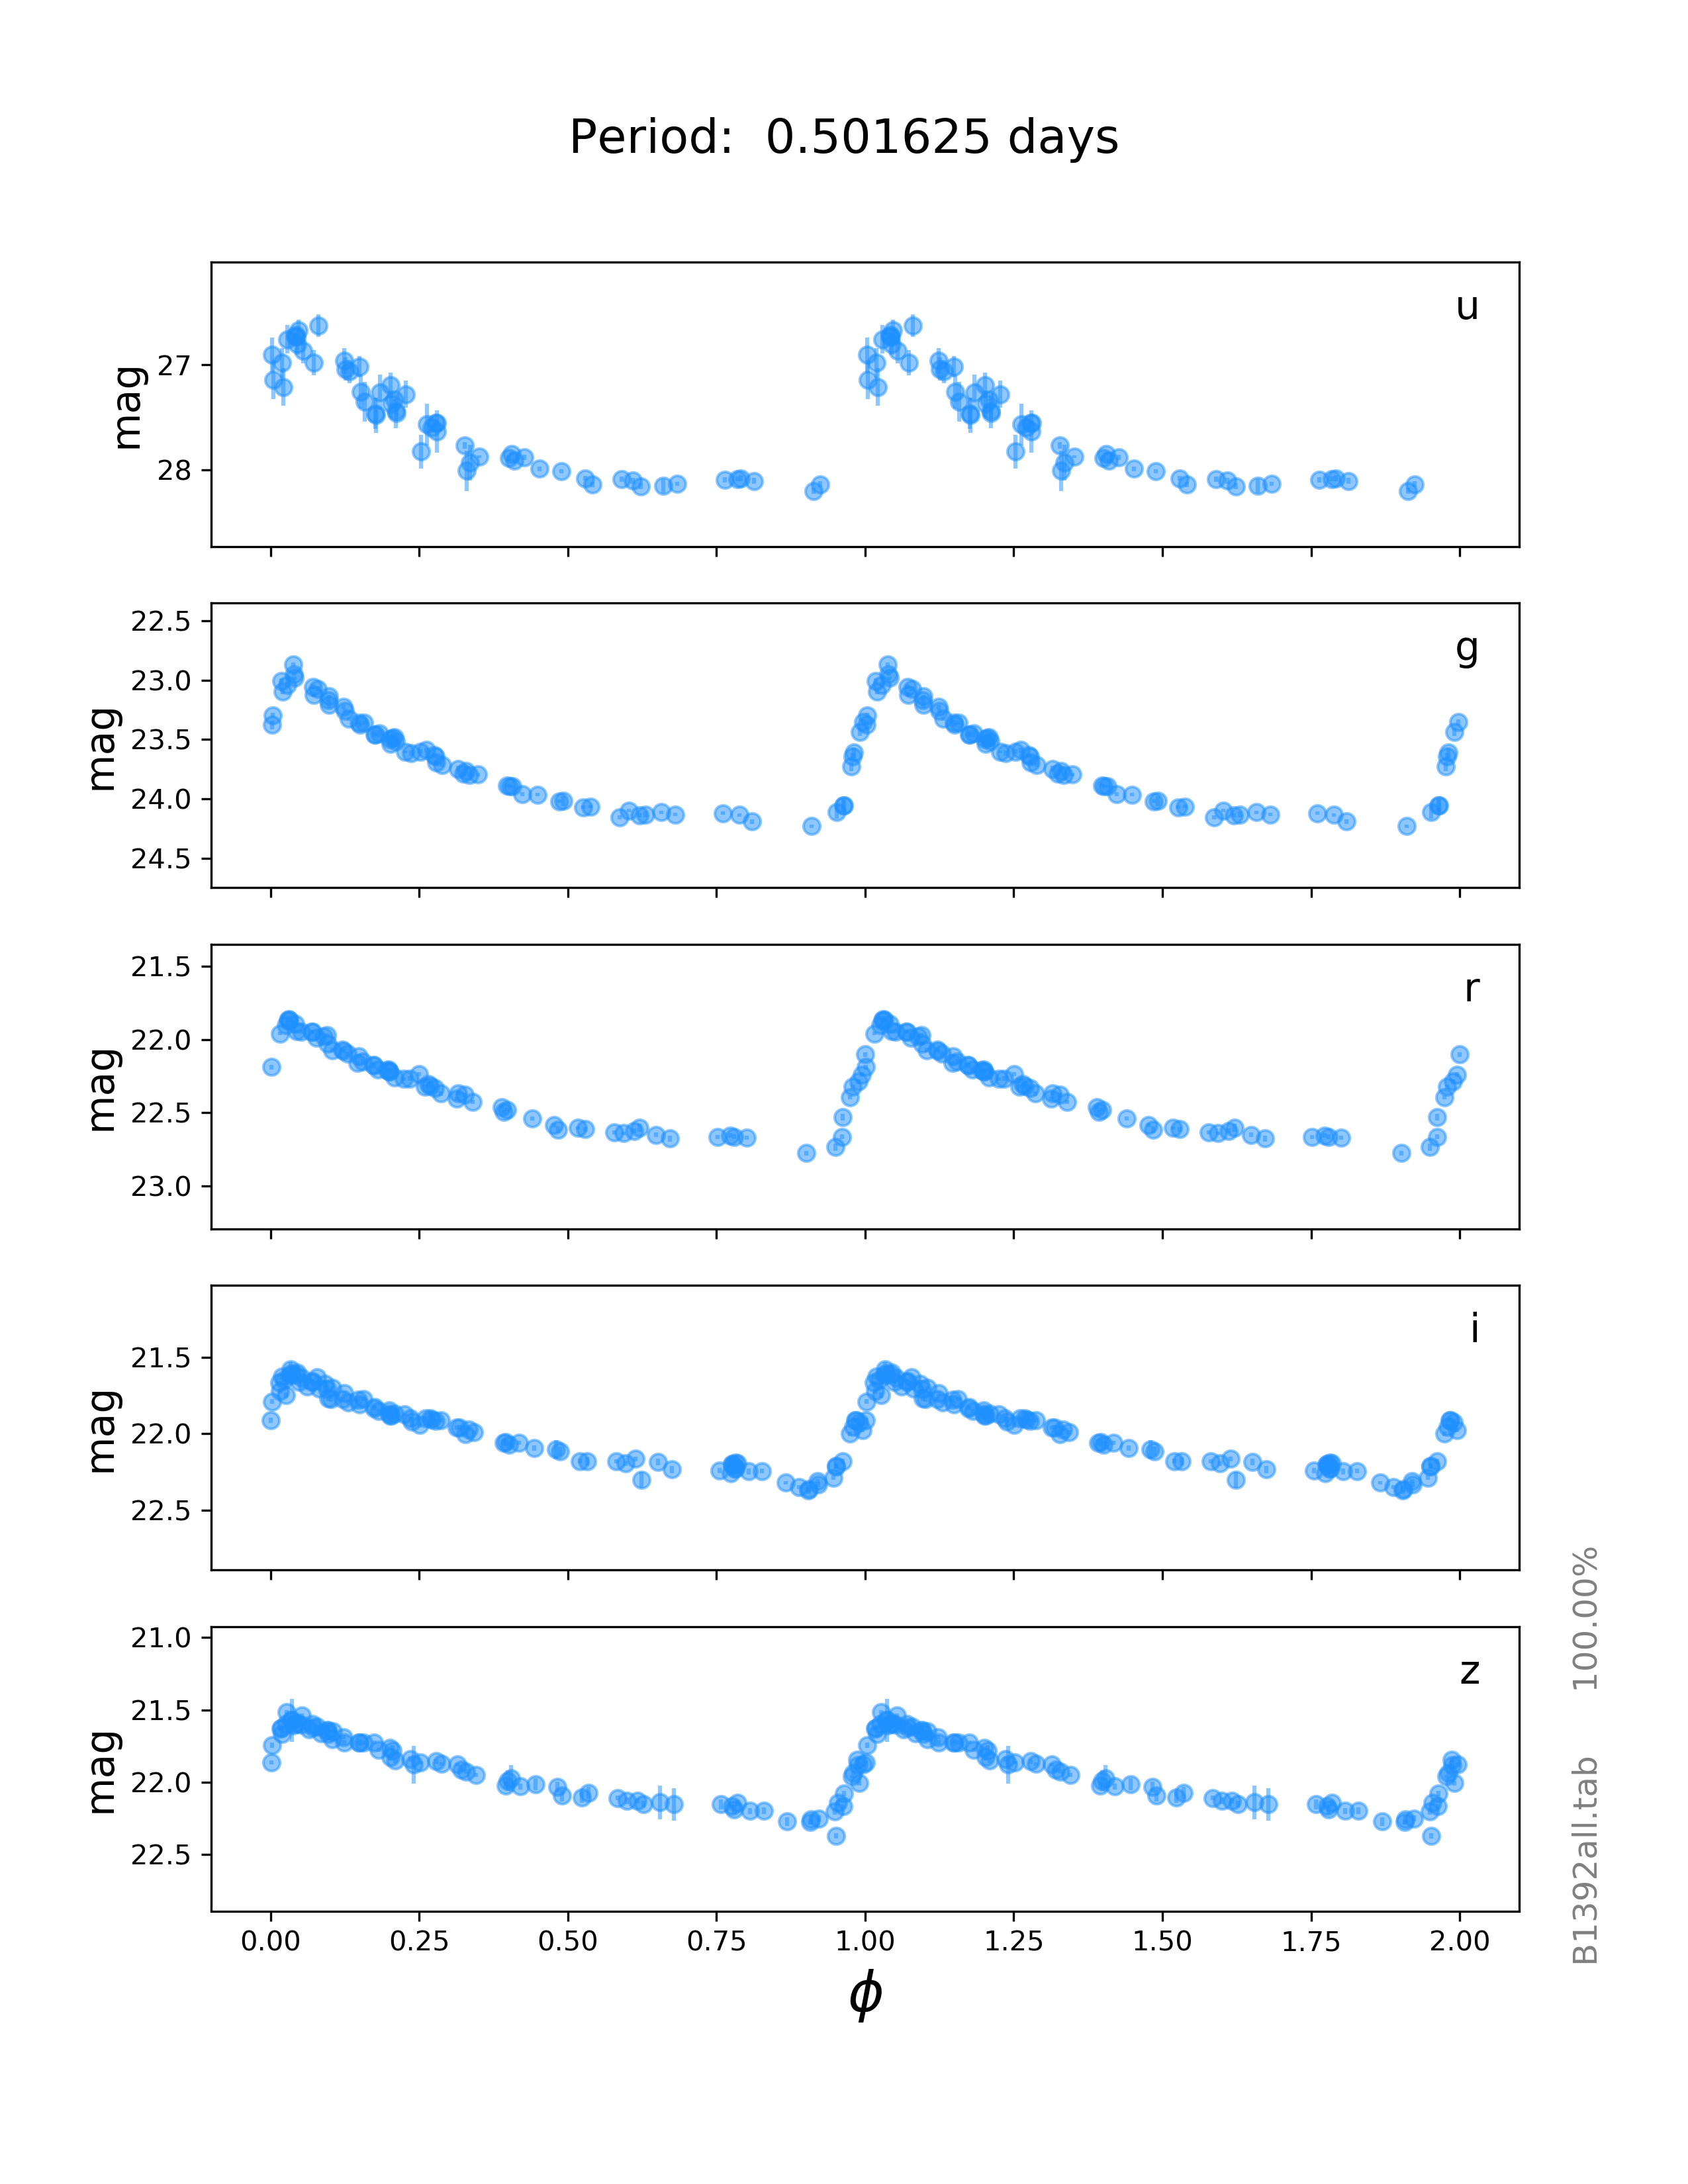

In [13]:
# Plot phased light curves for all filters
plot2 = 'psearch_fig_phi.png'
psearch_py.fig_phi_kjm_py( hjd, mag, magerr, filts, filtnams, period=p_peak,
    tag=tag, plotfile=plot2 )
IPython.display.Image(filename=plot2,width=600)

psearch_fig_obs.png  <--- plotfile written  :-)


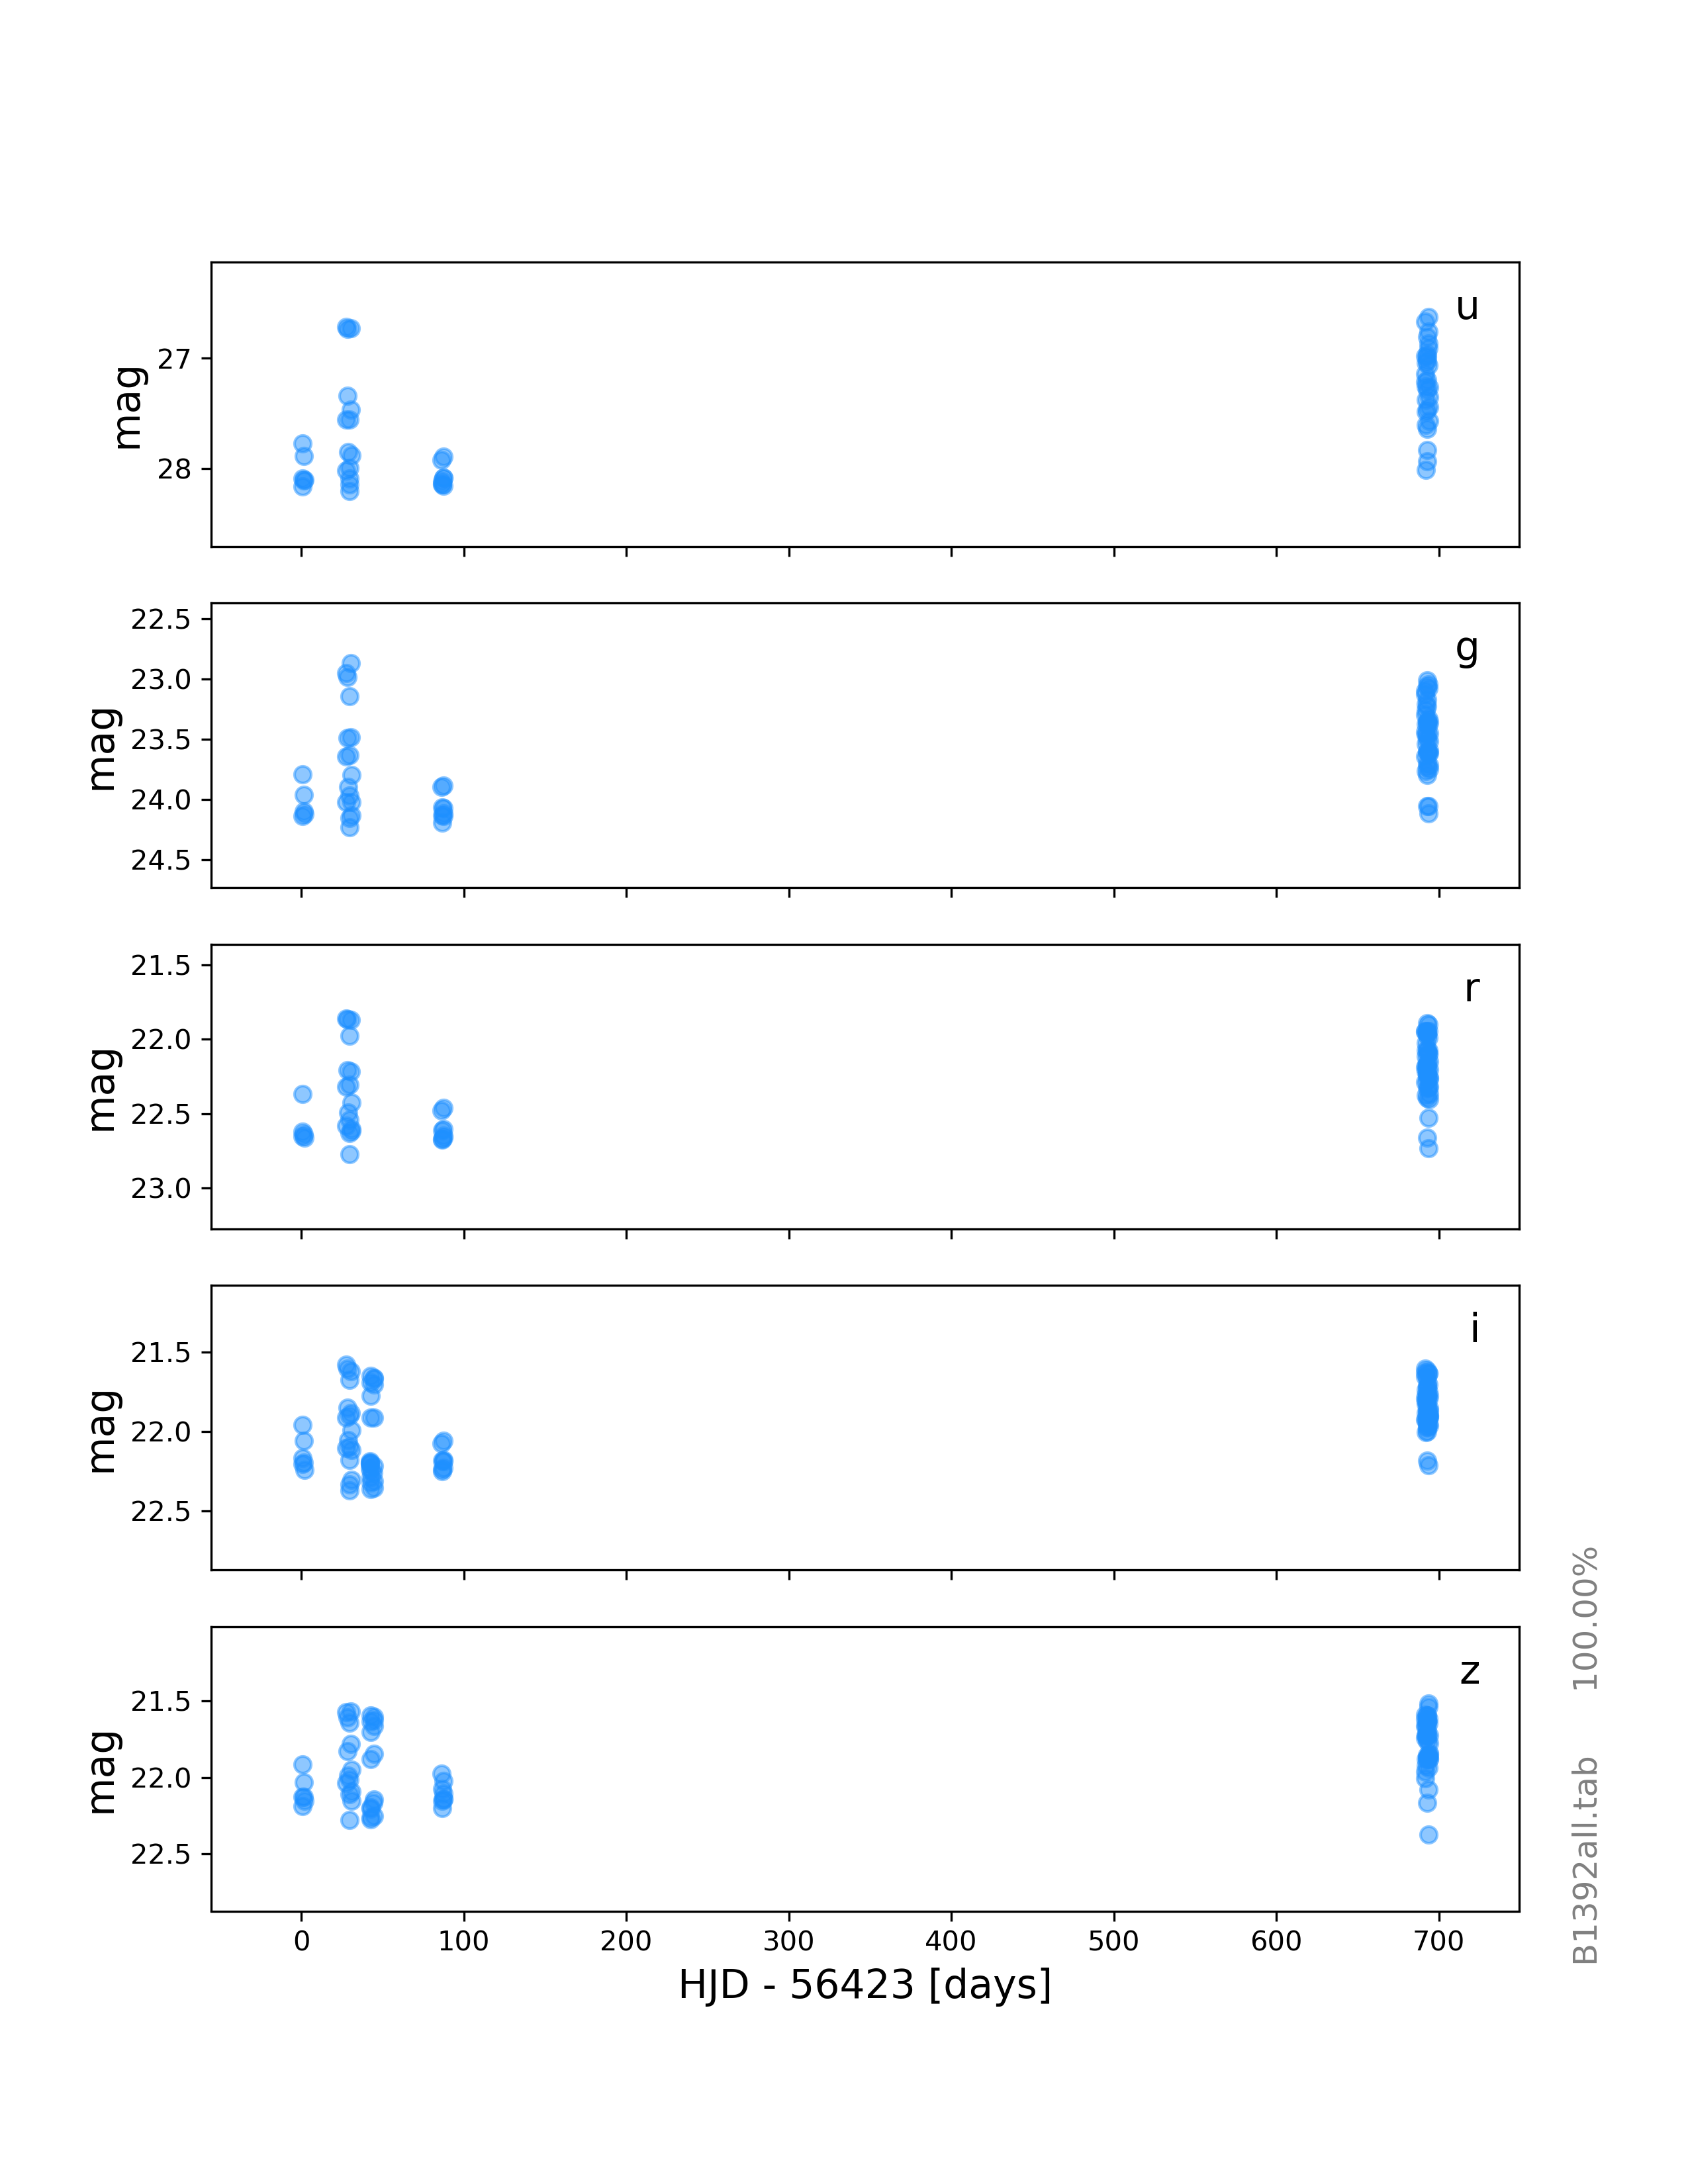

In [14]:
# Plot HJD vs. magnitude for all filters
plot3 = 'psearch_fig_obs.png'
psearch_py.fig_obs_kjm_py( hjd, mag, filts, filtnams, tag=tag, plotfile=plot3)
IPython.display.Image(filename=plot3,width=600)

In [15]:
print "That's all folks!\n\n:-)"

That's all folks!

:-)
